<a href="https://colab.research.google.com/github/jrg94/doodles/blob/master/visualizing_teaching_evaluations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [207]:
# Load data and take a peek
df = pd.read_csv("https://raw.githubusercontent.com/jrg94/doodles/master/teaching-evals/mean-evals-by-term.csv")
df.head()

,subject,course,class,term,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,cse,1223,26319,au18,4.13,4.38,4.72,4.75,4.50,4.72,4.53,4.53,4.44,4.63
1,cse,1223,8281,sp19,4.48,4.48,4.68,4.65,4.61,4.71,4.58,4.53,4.55,4.77
2,cse,2221,35160,au19,4.57,4.39,4.87,4.83,4.74,4.96,4.74,4.87,4.78,4.91
3,cse,2221,11278,sp20,4.03,4.45,4.72,4.69,4.66,4.83,4.62,4.55,4.48,4.76


In [208]:
# Load question labels
labels = pd.read_csv("https://raw.githubusercontent.com/jrg94/doodles/master/teaching-evals/question-labels.csv")
labels.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,The subject matter of this course was well org...,This course was intellectually stimulating,This instructor was genuinely interested in te...,The instructor encouraged students to think fo...,The instructor was well prepared,The instructor was genuinely interested in hel...,I learned a great deal from this instructor,The instructor created an atmosphere conducive...,The instructor communicated the subject matter...,"Overall, I would rate this instructor as"


In [209]:
# Load question distributions
dists = pd.read_csv("https://raw.githubusercontent.com/jrg94/doodles/master/teaching-evals/question-distributions.csv")
dists.head()

,subject,course,class,term,question,strongly disagree,disagree,neutral,agree,strongly agree,n/a
0,cse,1223,26319,au18,q1,0,0,13,63,25,0
1,cse,1223,26319,au18,q2,0,0,9,44,47,0
2,cse,1223,26319,au18,q3,0,0,3,22,75,0
3,cse,1223,26319,au18,q4,0,0,3,19,78,0
4,cse,1223,26319,au18,q5,0,0,13,25,63,0


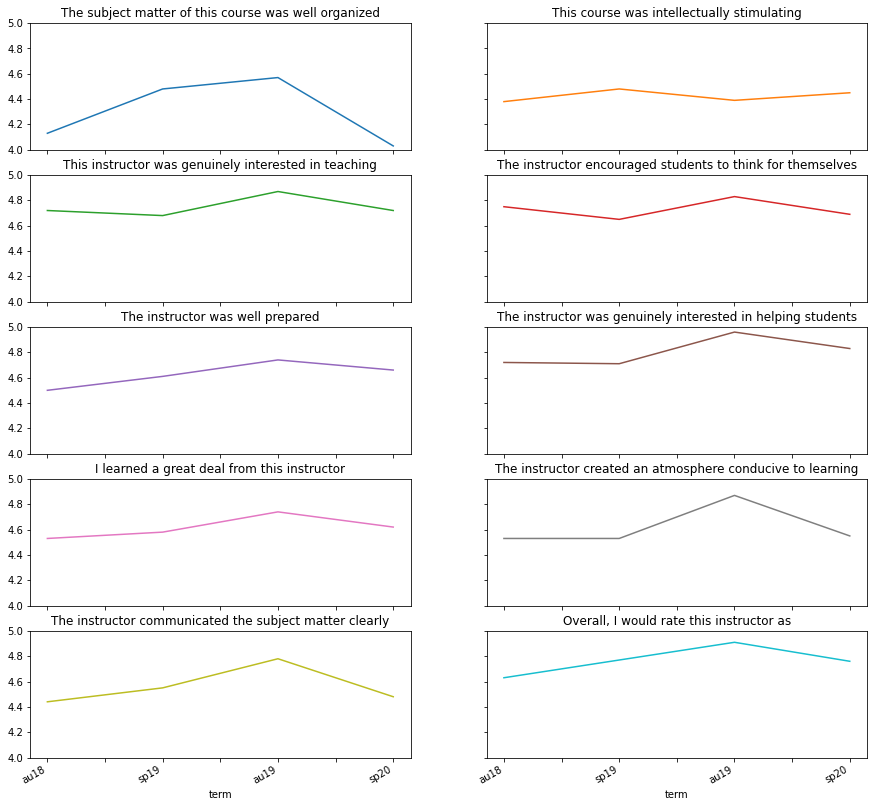

In [210]:
# Plot time series of all questions over 4 terms
results = df.plot(
    subplots=True,
    x="term", 
    y=["q1", "q2", "q3", "q4", "q5", "q6", "q7", "q8", "q9", "q10"],
    figsize=(15, 15),
    ylim=(4,5),
    title=list(labels.values[0]),
    legend=False,
    sharex=True,
    sharey=True,
    layout=(5,2)
)

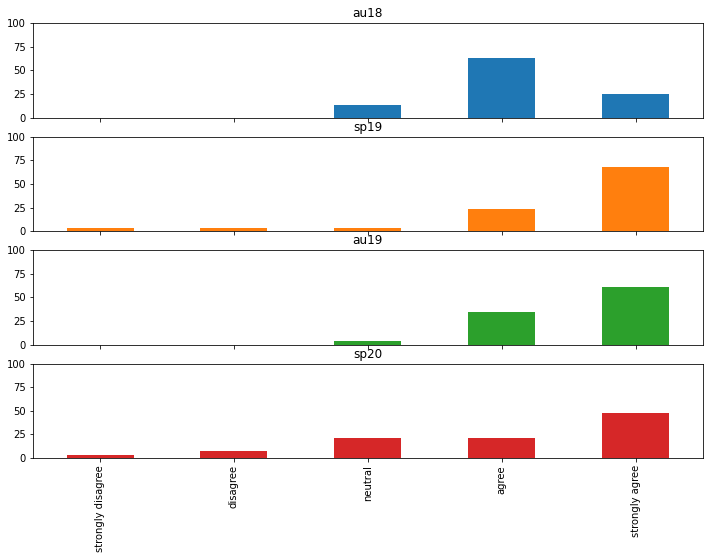

In [211]:
# Plot distributions of all four terms
filt = dists[dists["question"] == "q1"][
  ["term", "strongly disagree", "disagree", "neutral", "agree", "strongly agree"]
].set_index("term").T
results = filt.plot(
    kind="bar",
    subplots=True,
    figsize=(12, 8),
    ylim=(0,100),
    legend=False
)

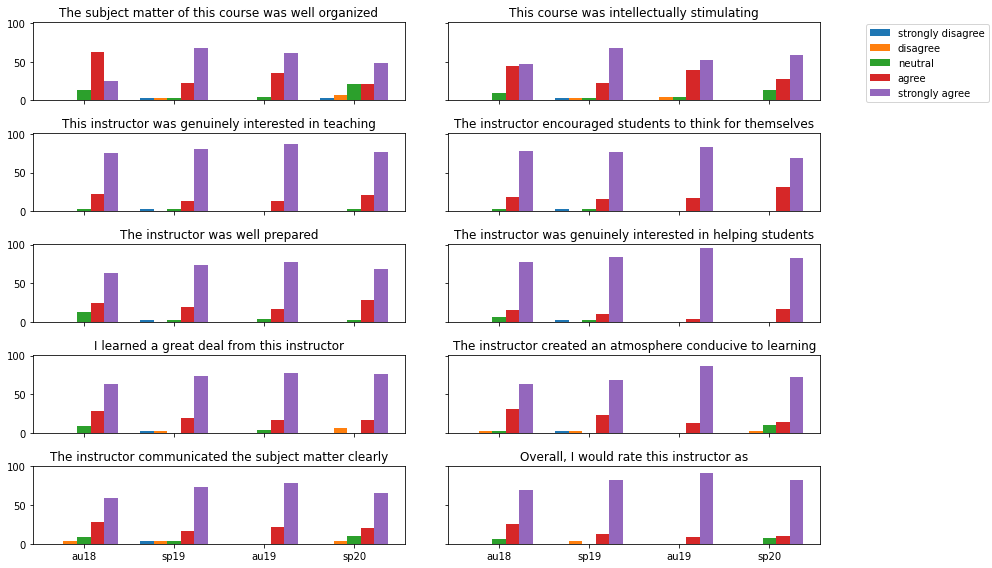

In [236]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 8), sharex=True, sharey=True)
width=.15

i = 1
for row in ax:
  for col in row:
    filt = dists[dists["question"] == f"q{i}" ][
      ["term", "strongly disagree", "disagree", "neutral", "agree", "strongly agree"]
    ].set_index("term").T
    col.set_title(labels.values[0][i - 1])
    for j in range(5):
      if j == 2:  # centers the tick
        col.bar(np.arange(4) + width * j, filt.iloc[j], width, label=filt.index[j], tick_label=filt.T.index, align="center")
      else:
        col.bar(np.arange(4) + width * j, filt.iloc[j], width, label=filt.index[j], align="center")
      handles, axes_labels = col.get_legend_handles_labels()
    i+=1
fig.legend(handles, axes_labels, loc="lower right", bbox_to_anchor=(1.15, .8))
fig.tight_layout()